# 1. Data Preparations

## a) The Numbers (TN)

#### Extracting Datasets from "The Numbers"

In [25]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [26]:
# Loading the numbers dataset 
tn = pd.read_csv(r"C:\Users\A808865\Desktop\moringa\Phase 2\Group Project\Box Office Blueprint\Data sets\tn.movie_budgets.csv.gz")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
# Understanding the data structure
tn.info()

print("Shape:", tn.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
Shape: (5782, 6)


#### Data Type Conversion and Cleaning

- Converted the release_date column from string format to datetime for proper date handling.
- Cleaned the currency columns (production_budget, domestic_gross, worldwide_gross) by removing dollar signs and commas, then converted them to 64-bit integers for numerical analysis.

In [28]:
# Convert release_date to datetime
tn['release_date'] = pd.to_datetime(tn['release_date'])

# Remove $ and , and convert to integers
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
    tn[col] = tn[col].replace('[\$,]', '', regex=True).astype('int64')


# Output
print(tn.dtypes)
tn.head()

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


#### Column Restructuring

- Removed the id column from the dataset.
- Created a new column  Release year by extracting the year component from the release_date column. 

In [29]:
# Drop the 'id' column
tn = tn.drop(columns=['id'])

# Extract year from 'release_date' and create a new 'year' column
tn['release_year'] = tn['release_date'].dt.year

# Now print to see the result
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


#### Summary Statistics

In [30]:
# Showing floats with commas and 3 decimal places instead of scientific notation

pd.set_option('display.float_format', '{:,.2f}'.format) 

tn.describe()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year
count,5782,"5,782.00","5,782.00","5,782.00","5,782.00"
mean,2004-07-06 05:20:31.546177792,"31,587,757.10","41,873,326.87","91,487,460.91","2,003.97"
min,1915-02-08 00:00:00,"1,100.00",0.00,0.00,"1,915.00"
25%,2000-04-22 18:00:00,"5,000,000.00","1,429,534.50","4,125,414.75","2,000.00"
50%,2007-03-02 00:00:00,"17,000,000.00","17,225,945.00","27,984,448.50","2,007.00"
75%,2012-12-25 00:00:00,"40,000,000.00","52,348,661.50","97,645,836.50","2,012.00"
max,2020-12-31 00:00:00,"425,000,000.00","936,662,225.00","2,776,345,279.00","2,020.00"
std,NaN,"41,812,076.83","68,240,597.36","174,719,968.78",12.72



- Our data is spans over 100 years (From 1915 to 2020) 
Most Movies have smaller budget than average (mean > Median)
- High Standard deviation hence lots of variability
- Some movies perform well globally due to the high mean, we should therefore look at international markets wheb evaluating box office performance

#### Exploring Incomplete Gross Earnings

In [31]:
# Filter movies with 0 domestic gross but non-zero worldwide gross
no_domestic = tn[(tn['domestic_gross'] == 0) & (tn['worldwide_gross'] != 0)]
no_domestic

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
617,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,2012
619,2019-01-22,Renegades,77500000,0,1521672,2019
820,2018-10-26,Air Strike,65000000,0,516279,2018
1325,2012-12-31,Foodfight!,45000000,0,73706,2012
1367,2006-12-31,Les BronzÃ©s 3: amis pour la vie,42000000,0,83833602,2006
...,...,...,...,...,...,...
5590,2015-03-24,Along the Roadside,250000,0,3234,2015
5652,2015-12-31,Lumea e a mea,168000,0,29678,2015
5661,2013-12-31,Speak No Evil,150000,0,32927,2013
5705,2011-12-31,Absentia,70000,0,8555,2011


In [32]:
# Filter movies with both domestic and worldwide gross equal to 0
no_gross = tn[(tn['domestic_gross'] == 0) & (tn['worldwide_gross'] == 0)]

## Droppings rows with no worldwide or domestic gross
tn = tn.drop(no_gross.index)
tn


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,2006
5776,2004-12-31,The Mongol King,7000,900,900,2004
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005


In [33]:
# Filter movies with non-zero domestic gross but 0 worldwide gross
no_worldwide = tn[(tn['worldwide_gross'] == 0) & (tn['domestic_gross'] != 0)]
no_worldwide

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year


The best strategy is to produce movies that strike a balance between strong domestic appeal and international potential. Domestic box office earnings are a reliable baseline for worldwide success, movies that earn domestically almost always generate revenue internationally as well. However, while less than 1% of movies earn revenue overseas despite little or no domestic earnings, this minority highlights the importance of considering global market preferences.







### Financial Performance Metrics (Profit & ROI)

In [34]:
# Calculated Profit
tn['profit'] = tn['worldwide_gross'] - tn['production_budget']

# Calculated ROI (as a percentage)
tn['Return on Investment(ROI)'] = (tn['profit'] / tn['production_budget']) * 100

tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,Return on Investment(ROI)
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.26
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.67
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.21
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.38
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.37


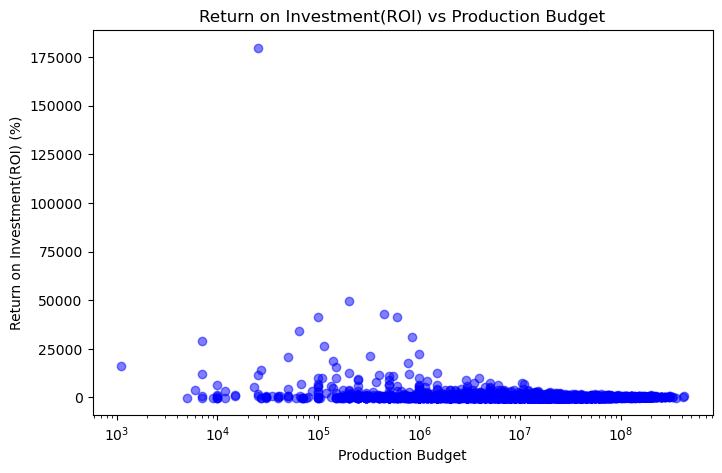

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(tn['production_budget'], tn['Return on Investment(ROI)'], color='blue', alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Return on Investment(ROI) (%)')
plt.title('Return on Investment(ROI) vs Production Budget')
plt.xscale('log')  # Log scale to better visualize wide range budgets
plt.show()

##### Aim:
For every \$1 that was spent, how much (%) did they get back in profit?

##### Plot Interpretations:
- We used Scatter plot because it is ideal for visualizing relationships between two continuous variables (Production budget and ROI)
- Each dot = 1 movie.
- We used log scale to better visualize wide range budgets (10^(4) = 10,000)

##### Observations:
1. High ROI isn't tied to high budget - The movies with the highest ROI are mostly in the low to mid-budget range (\$10k–\$1M).

2. Big budgets ≠ big ROI - Expensive movies (>\$100M or 10^(8)) tend to have lower ROI, even if they make lots of money because their production costs are huge.

3. Diminishing returns at higher budgets - As budgets grow, ROI tends to flatten. Studios make profits, but the percentage return shrinks.


##### Recomendation

- Consider low to Mid budget movies as they can be highly profitable - These movies are less risky and often perform better per dollar invested. For example  \$1M movie can return 5000% ROI. Avoid avoid mega budgeted movies early on because they don’t guarantee high ROI and they are huge risks because they need global distribution power.


##### Limitation 
Our data doesnt have genres because it would have allowed us to look for genres that thrive on Small Budgets


#### a) Grouping movies by release_year and production_budget brackets

Created a new column `budget_bracket` by categorizing `production_budget` into labeled bins: <10M, 10M-50M, 50M-200M, and 200M or more (up to max budget).


In [36]:
# Creating budget brackets (bins)
bins = [0, 10_000_000, 50_000_000, 200_000_000, tn['production_budget'].max() + 1]

labels = ['<10M', '10M-50M', '50M-200M', '>200M']

tn['budget_bracket'] = pd.cut(tn['production_budget'], bins=bins, labels=labels, right=False)
tn



,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,Return on Investment(ROI),budget_bracket
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.26,>200M
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.67,>200M
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.21,>200M
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.38,>200M
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.37,>200M
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,2006,64644,923.49,<10M
5776,2004-12-31,The Mongol King,7000,900,900,2004,-6100,-87.14,<10M
5778,1999-04-02,Following,6000,48482,240495,1999,234495,"3,908.25",<10M
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,-3662,-73.24,<10M


##### b) Analyzing average ROI and profit for each budget bracket category.


In [37]:
budget_summary = tn.groupby('budget_bracket')[['Return on Investment(ROI)', 'profit']].mean().reset_index()
budget_summary


,budget_bracket,Return on Investment(ROI),profit
0,<10M,894.37,"14,098,381.77"
1,10M-50M,193.82,"41,407,432.07"
2,50M-200M,171.26,"158,823,993.18"
3,>200M,273.95,"648,035,806.38"


<Figure size 800x500 with 0 Axes>

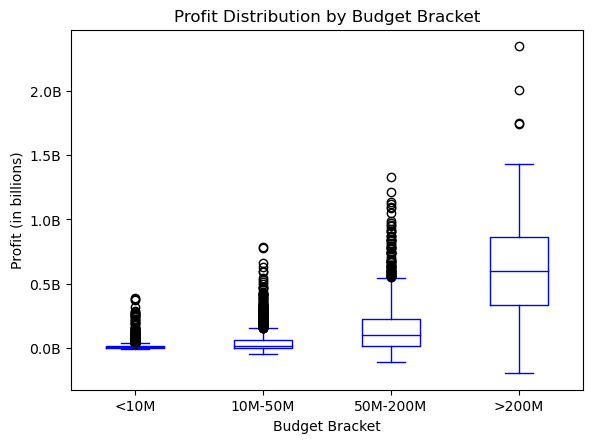

In [38]:
plt.figure(figsize=(8,5))
tn.boxplot(column='profit', by='budget_bracket', grid=False, color='blue')
plt.title('Profit Distribution by Budget Bracket')
plt.suptitle('')
plt.xlabel('Budget Bracket')
plt.ylabel('Profit (in billions)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
plt.show()


##### Plot Interpretation:
- Boxplots can be used to compare groups thus shows how profit varies across diffrent movie budget bracket brackets. 
- There are many outliers in our data and boxplot shows the outliers clearly which are important for profitability analysis.
- Boxplots show median, spread, and skewnes thus it's easy to feel the spread & risk of our data
- Each Box: 
  - Middle line = median profit.
  - Box edges = 25th and 75th percentiles (interquartile range).
  - Whiskers = range of most data.
  - Dots = outliers (very high profits).

##### Observation
1. <10M Budget Bracket - Suggests Low median and tight spread small movies generally earn small profits.
 - Low median profit.
 - Narrow box and whiskers → low variability.
 - A few outliers with decent profit, but most profits are small.


2. 10M–50M Budget Bracket - Slightly better profit, but still not extreme.
 - Slightly higher median than <10M.
 - Moderate spread.
 - A noticeable number of outliers, suggesting a few highly profitable exceptions.
 

3. 50M–200M Budget Bracket - Suggests a sweet spot where both median profit and upside are attractive, though risk increases (more variability).
 - Higher median profit and wider box (more variability).
 - Many positive outliers (successful movies).


4.>200M Budget Bracket - Indicates high risk, high reward territory (Most profitable bracket) but very wide spread and many outliers (some huge hits, some flops)
 - Highest median profit of all brackets.
 - Very wide spread and tall box (high variability).
 - Many high value outliers (up to 2.3B), but also some low or even negative profits.

##### Recomendation: 
We should target a production budget of possibly between 50-200M range as it balances balances risk and return.
Production budget of more than 200M dominates in average profit, it has the highest upside and variability. Smaller budgeted movies are less risky, they have less variability and fewer outliers 

##### c) ROI trend over release years

In [39]:
yearly_summary = tn.groupby('release_year')[['Return on Investment(ROI)', 'profit']].mean().reset_index()
yearly_summary

,release_year,Return on Investment(ROI),profit
0,1915,"9,900.00","10,890,000.00"
1,1916,"3,900.00","7,800,000.00"
2,1920,"2,900.00","2,900,000.00"
3,1925,"4,505.18","13,427,500.00"
4,1929,"1,049.87","3,979,000.00"
...,...,...,...
87,2015,361.69,"79,475,952.92"
88,2016,267.79,"97,451,876.18"
89,2017,329.01,"124,338,555.59"
90,2018,303.05,"137,645,677.85"


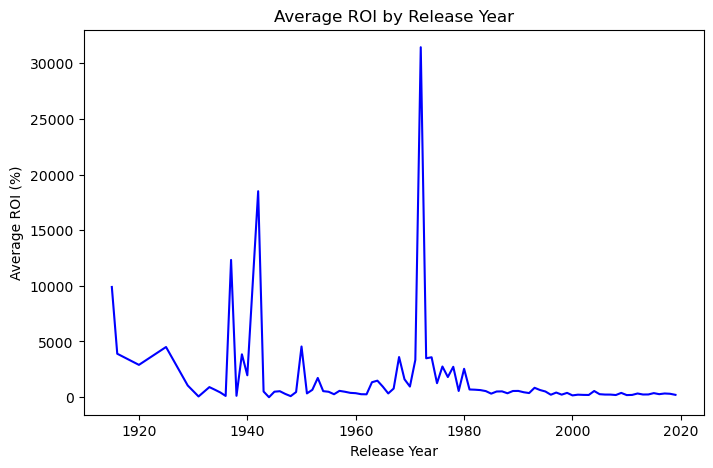

In [40]:
plt.figure(figsize=(8,5))
plt.plot(yearly_summary['release_year'], yearly_summary['Return on Investment(ROI)'], color='blue')
plt.xlabel('Release Year')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI by Release Year')
plt.show()


##### Plot Interpretation:
- To look at how does ROI change over time, and when was investment in movies most efficient? We used time series to track how ROI changes so that it is easy for us to focus on investment performance over the years.


##### Observation:
- Extremely high ROI spikes occur in older movies (like 1930s–1970s), e.g., a peak above 30,000% around 1972.
- After the 1980s, ROI stabilizes and drops to more realistic levels.
- From 1990 onward, average ROI is consistently much lower, usually below 1,000%.


##### Conclusion:
Investment in movies was most efficient in the earlier decades as shown by the significantly higher average ROI compared to more recent years though there may also be fewer records for early years, causing data distortion from a few standout movies. ROI has become more conservative over time.To inspire cost effective production strategies today we could study eras of high return movie models (genres, formats, release strategies or potentially produce remakes of 1930s–1970s era of movies with modern twist


##### d) top performers by ROI and profit

In [41]:
# Top 5 movies by ROI
top_roi = tn.sort_values('Return on Investment(ROI)', ascending=False).head(5)[['movie', 'Return on Investment(ROI)', 'profit', 'production_budget']]
print("Top 5 movies by ROI:")
top_roi


Top 5 movies by ROI:


,movie,Return on Investment(ROI),profit,production_budget
5745,Deep Throat,"179,900.00",44975000,25000
5613,Mad Max,"49,775.00",99550000,200000
5492,Paranormal Activity,"43,051.79",193733034,450000
5679,The Gallows,"41,556.47",41556474,100000
5406,The Blair Witch Project,"41,283.33",247700000,600000


In [42]:
# Top 5 movies by profit
top_profit = tn.sort_values('profit', ascending=False).head(5)[['movie', 'profit', 'Return on Investment(ROI)', 'production_budget']]
print("\nTop 5 movies by Profit:")
top_profit


Top 5 movies by Profit:


,movie,profit,Return on Investment(ROI),production_budget
0,Avatar,2351345279,553.26,425000000
42,Titanic,2008208395,"1,004.10",200000000
6,Avengers: Infinity War,1748134200,582.71,300000000
5,Star Wars Ep. VII: The Force Awakens,1747311220,571.02,306000000
33,Jurassic World,1433854864,666.91,215000000


## Regression Modelling

Which production budgets yield the highest return on investment (ROI) in movies?

To explore this, we used ROI as the target variable and production budget as the predictor. We applied a simple linear regression model to examine the relationship and evaluated its performance using R² and Mean Squared Error (MSE).


In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split   # for splitting data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining features (X) and target (y) variables
#'production_budget' as the feature and 'Return on Investment(ROI)' as the target
X = tn[['production_budget']]
y = tn['Return on Investment(ROI)']

# Splitting data into train and test sets (80% for training the model & 20% for testing how well it works)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# metrics to evaluate how well the model performs
print(f"Mean Squared Error: {mse}")    # how far the predictions are from the actual values

print(f"R² Score: {r2}")  # how much of the variation in ROI your model can explain (1 is perfect, 0 is useless)


Mean Squared Error: 3427007.8836275986
R² Score: 0.00691948206586368


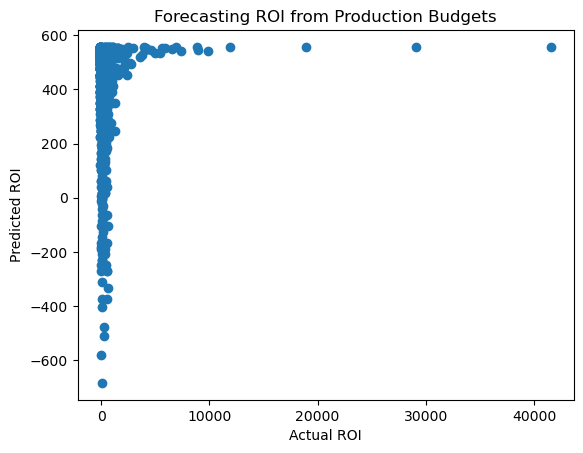

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Forecasting ROI from Production Budgets")
plt.show()


The model shows that production budget alone has almost no predictive power for a movie’s ROI (R² = 0.0069), meaning we can’t reliably estimate profitability just from how much was spent on production. This weak relationship highlights a key limitation: production budgets typically exclude other critical financial factors such as marketing expenses, cinema or streaming platform cuts, and backend deals. Simply spending more on production doesn’t guarantee higher returns. To make better predictions, we would likely need a broader range of data that captures the full financial picture of a movie’s lifecycle.